# Palmer Penguins Modeling

Import the Palmer Penguins dataset and print out the first few rows.

Suppose we want to predict `bill_depth_mm` using the other variables in the dataset.

**Dummify** all variables that require this.

In [1]:
import pandas as pd
from palmerpenguins import load_penguins

penguins = load_penguins()
penguins.dropna(subset=['bill_depth_mm'], inplace=True)
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007


In [6]:
import numpy as np
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)

num_transform = Pipeline([
    ("impute", SimpleImputer(strategy="mean")),
    ("scalar", StandardScaler())
])
cat_transform = Pipeline([
    ("impute", SimpleImputer(strategy="most_frequent")),
    ("dummy", OneHotEncoder())
])

ct = ColumnTransformer([
    ('num', num_transform, make_column_selector(dtype_include=np.number)),
    ("cat", cat_transform, make_column_selector(dtype_include=object))
])

Let's use the other variables to predict `bill_depth_mm`. Prepare your data and fit the following models on the entire dataset:

* Your best multiple linear regression model from before
* Two kNN models (for different values of K)
* A decision tree model

Create a plot like the right plot of Fig 1. in our `Model Validation` chapter with the training and test error plotted for each of your four models.

Which of your models was best?

In [9]:
X = penguins.drop(columns=['bill_depth_mm'])
y = penguins['bill_depth_mm']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

pipeline_lr = Pipeline(
    [("preprocessor", ct),
     ("regressor", LinearRegression())]
     )

pipeline_knn5 = Pipeline(
    [("preprocessor", ct),
     ("kNN", KNeighborsRegressor(n_neighbors=5))]
)

pipeline_knn10 = Pipeline(
    [("preprocessor", ct),
     ("kNN", KNeighborsRegressor(n_neighbors=10))]
)

pipeline_tree = Pipeline(
    [("preprocessor", ct),
     ("decision", DecisionTreeRegressor())]
)

In [10]:
pipeline_lr.fit(X_train, y_train)
pipeline_knn5.fit(X_train, y_train)
pipeline_knn10.fit(X_train, y_train)
pipeline_tree.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer()),
                                                                  ('scalar',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x1124a9ed0>),
                                                 ('cat',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('dummy',
                                                                   OneHotEncoder())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x137a69cc0>)])),
                ('decision', DecisionTreeRegressor())])

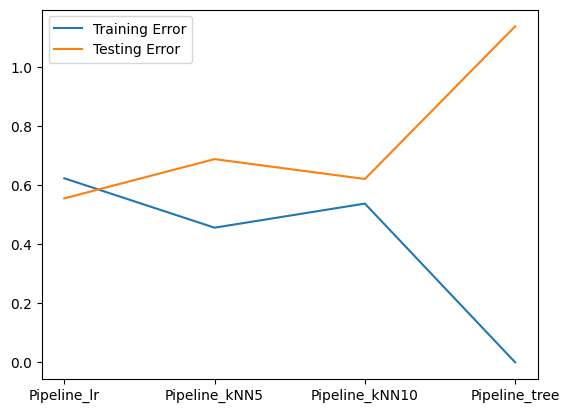

In [12]:
import matplotlib.pyplot as plt

train_error_1 = mean_squared_error(y_train, pipeline_lr.predict(X_train))
test_error_1 = mean_squared_error(y_test, pipeline_lr.predict(X_test))

train_error_2 = mean_squared_error(y_train, pipeline_knn5.predict(X_train))
test_error_2 = mean_squared_error(y_test, pipeline_knn5.predict(X_test))

train_error_3 = mean_squared_error(y_train, pipeline_knn10.predict(X_train))
test_error_3 = mean_squared_error(y_test, pipeline_knn10.predict(X_test))

train_error_4 = mean_squared_error(y_train, pipeline_tree.predict(X_train))
test_error_4 = mean_squared_error(y_test, pipeline_tree.predict(X_test))

train_errors = [train_error_1, train_error_2, train_error_3, train_error_4]
test_errors = [test_error_1, test_error_2, test_error_3, test_error_4]

x = range(1, 5)
plt.plot(x, train_errors, label='Training Error')
plt.plot(x, test_errors, label='Testing Error')
plt.xticks(ticks=x, labels=['Pipeline_lr', 'Pipeline_kNN5', 'Pipeline_kNN10', 'Pipeline_tree'])
plt.legend()
plt.show()